-----
__********code refactoring 진행할 것. -> 모듈화********__  



# Introduction
## use several ML techniques to build model
   0. Data Preprocessing
   1. DT  
   2. RF  
   3. Linear Regression  
   4. Logistic Regression  
   5. SVD    
   6. Gradient Boosting Regression Tree

In [1]:
import pandas as pd
import csv

## Data Preprocessing

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
from jupyterthemes import jtplot

jtplot.style(theme = 'onedork')
#jtplot.reset() # onedork

In [58]:
import matplotlib.font_manager as fm

font_path = '/Library/Fonts/NanumBarunGothic.otf'
font_name=fm.FontProperties(fname=font_path, size=12).get_name()
plt.rc('font', family=font_name)

In [5]:
movie = pd.read_csv('movie_nonmulti_scaled.csv')

In [28]:
from sklearn import preprocessing

In [6]:
for i in movie :
    idx = movie[i]
    print(i)
    j = movie[idx.isnull()==True]
    print(j[i].axes[0])

movieCd
Int64Index([], dtype='int64')
showTm
Int64Index([ 415,  699,  804,  841,  886,  896,  938, 1498, 1636, 1640,
            ...
            5952, 6022, 6058, 6107, 6108, 6110, 6111, 6112, 6142, 6159],
           dtype='int64', length=165)
rating
Int64Index([   0,    2,    3,    4,    7,   12,   14,   15,   16,   18,
            ...
            6173, 6175, 6179, 6180, 6181, 6182, 6188, 6189, 6193, 6194],
           dtype='int64', length=2162)
type
Int64Index([], dtype='int64')
genre_1
Int64Index([ 178,  210,  223,  226,  243,  716,  852,  977,  993,  998, 1025,
            1064, 1081, 1106, 1107, 1338, 1445, 1460, 1498, 1543, 1636, 1640,
            1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1656, 1657,
            1661, 1683, 1691, 1697, 1700, 1706, 1749, 1770, 1871, 1879, 1924,
            2023, 2042, 2064, 2093, 2119, 2120, 2136, 2167, 2188, 2240, 2243,
            2246, 2249, 2251, 2252, 2267, 2269, 2339, 2745, 2781, 2900, 3579,
            4304, 4620, 4629, 4630, 46

In [243]:
kkk = movie.median()

/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:959: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [244]:
kkk

showTm            9.600000e+01
rating            7.570000e+00
director_cnt      1.000000e+00
director_1       -2.384981e-01
director_2       -2.401797e-01
actor_cnt         2.000000e+00
actor_1          -3.619094e-01
actor_2          -3.512897e-01
actor_3          -2.469820e-01
actor_4          -1.429116e-01
actor_5          -3.436745e-02
company_supply   -2.498934e-02
company_making   -3.684837e-01
genre_cnt         1.000000e+00
genre_1          -4.791034e-01
genre_2          -1.612400e-01
genre_3                    NaN
grade            -6.645414e-01
nation_cnt        1.000000e+00
nation_1          1.320417e+00
nation_2          2.258016e-01
salesAcc          3.029500e+06
audiAcc           9.165000e+02
director                   NaN
actor                      NaN
genre                      NaN
nation                     NaN
dtype: float64

In [289]:
values = {'actor_1' : kkk['actor_1'],
          'actor_2' : kkk['actor_2'],
          'actor_3' : kkk['actor_3']}

In [273]:

remain_feature_list = ['showTm', 'genre_1', 'director_1', 'actor_1',
                       'company_supply', 'company_making', 'grade',
                       'salesAcc', 'audiAcc', 'nation_1',
                       'rating',
                       'actor_2' ,'actor_3']

remove_feature_list = ['movieCd', 'genre_2', 'genre_3', 'director_2',
                       'actor_4', 'actor_5', 'nation_2',
                       'nation_cnt', 'actor_cnt', 'director_cnt', 'genre_cnt',
                       'director', 'actor', 'genre', 'nation']

In [294]:
values

{'actor_1': -0.3619094047487205,
 'actor_2': -0.3512897050725332,
 'actor_3': -0.2469820186950711}

In [295]:
kk = movie
kk = kk.fillna(value=values)

In [296]:
#k = movie
#k.fillna(value=values)
#movie2 = k
k = kk
   
for i in kk : 
    idx = kk[i]
    if (i in remain_feature_list) :
        j = kk[idx.isnull() == True]
        print(i+ " " +str(len(j)))
        for l in j[i].axes[0] :
            try :
                k = k.drop(l, axis = 0)
            except :
                continue
             

mov = k.drop(columns = [t for t in remove_feature_list], axis = 1)

showTm 163
rating 787
director_1 460
actor_1 0
actor_2 0
actor_3 0
company_supply 1536
company_making 2383
genre_1 83
grade 0
nation_1 3
salesAcc 0
audiAcc 0


In [297]:
len(mov)

951

In [279]:
mov.columns

Index(['showTm', 'rating', 'director_1', 'actor_1', 'actor_2', 'actor_3',
       'company_supply', 'company_making', 'genre_1', 'grade', 'nation_1',
       'salesAcc', 'audiAcc'],
      dtype='object')

In [298]:
mov['audiClass'] = 0
# mov = mov.drop(columns = ['Unnamed: 0'])

def classification_by_audiences(movv):
    mo = movv
    for i in range(len(mo)):
        if float(mo.iloc[i, 12]) < 500000:
            mo.iloc[i, 13] = 0 # '~50만'
        elif float(mo.iloc[i, 12]) < 1000000:
            mo.iloc[i, 13] = 1 # '~100만'
        elif float(mo.iloc[i, 12]) < 2000000:
            mo.iloc[i, 13] = 2 # '~200만'
        elif float(mo.iloc[i, 12]) < 5000000:
            mo.iloc[i, 13] = 3 # '~500만'
        elif float(mo.iloc[i, 12]) < 10000000:
            mo.iloc[i, 13] = 4 # '~1000만'
        else :
            mo.iloc[i, 13] = 5 # '1000만~'
            
    return mo

mo = classification_by_audiences(mov)

In [153]:
mo.to_csv('mov_3actor_all.csv', index = False, encoding = 'utf-8')

In [200]:
mov = mo

In [56]:
import json

with open('movie_data_table.json', 'r') as f :
    movie_data_table = json.load(f)
movie_data_table['grade']

{'12세관람가': '0',
 '전체관람가': '1',
 '12세이상관람가': '2',
 '15세관람가': '3',
 '12세 미만인 자는 관람할 수 없는 등급': '4',
 '': '5',
 '청소년관람불가': '6',
 '18세관람가': '7',
 '연소자관람불가': '8',
 '15세이상관람가': '9',
 '연소자관람가': '10',
 '고등학생이상관람가': '11',
 '중학생이상관람가': '12',
 '국민학생관람불가': '13',
 '미성년자관람불가': '14',
 '15세 미만인 자는 관람할 수 없는 등급 ': '15',
 '모든 관람객이 관람할 수 있는 등급': '16',
 '18세 미만인 자는 관람할 수 없는 등급': '17',
 '미정': '18',
 '기타': '19'}

In [299]:
mov['rating'] = preprocessing.minmax_scale(mov['rating'])

In [202]:
mov.head(5)

,showTm,rating,director_1,actor_1,actor_2,actor_3,company_supply,company_making,genre_1,grade,nation_1,salesAcc,audiAcc,audiClass
0,128.0,0.845,10.295296,1.062385,2.038548,1.407467,13.607305,4.110119,1.822388,0.838578,1.320417,1.357560e+11,17615437.0,5
1,139.0,0.783,11.535326,2.662268,1.909647,2.551117,6.469050,8.587130,0.817444,1.481334,1.320417,1.157059e+11,14411477.0,5
2,126.0,0.901,14.650529,1.526080,2.850256,2.832220,13.607305,3.069531,-0.355175,1.481334,1.320417,1.109381e+11,14262922.0,5
3,123.0,0.901,4.836839,1.526080,1.498996,2.049145,13.607305,3.998974,1.310998,0.838578,1.320417,1.051689e+11,13414136.0,5
4,141.0,0.771,11.535326,2.662268,2.551117,2.258545,1.201644,8.587130,0.817444,1.481334,1.320417,1.026649e+11,12274846.0,5


In [157]:
mov.to_csv('mov_3actors_all_scaled.csv', index=False)

In [32]:
from sklearn.model_selection import train_test_split

X = mov[mov.columns[0:11]]
y = mov[mov.columns[13]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
X.columns

Index(['showTm', 'rating', 'director_1', 'actor_1', 'actor_2', 'actor_3',
       'company_supply', 'company_making', 'genre_1', 'grade', 'nation_1'],
      dtype='object')

## functions

In [272]:
movie_feature_names = np.array(['showTm', 'rating', 'director_1',
                                'actor_1', 'company_supply', 'nation_1',
                                'company_making', 'genre_1', 'grade',
                                'actor_2', 'actor_3'])

In [229]:
def plot_feature_importances_movie(model):
    # movie_feature_name = np.array(remain_feature_list)
    # movie_feature_names
    n_features = movie_feature_names.size
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), movie_feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10)

In [36]:
from sklearn.metrics import classification_report

cross-validation example  

---
`
scores = cross_val_score(model_name, X, y, cv=number)
`

In [37]:
from sklearn.utils.multiclass import unique_labels

In [48]:
from sklearn.metrics import confusion_matrix

In [38]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # print(cm)
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [41]:
from sklearn.metrics import accuracy_score

# Models

## Decision Tree

In [125]:
## 1. DT
# Decision Tree
from sklearn import tree
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

movie_tree = tree.DecisionTreeRegressor(criterion='friedman_mse', random_state=0)
movie_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [24]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

NameError: name 'sc' is not defined

In [122]:
Xts = pd.DataFrame(sc.transform(X_train), columns=['showTm', 'rating', 'director_1', 'actor_1', 'company_supply',
       'company_making', 'genre_1', 'grade', 'nation_1'])

In [119]:
X_train

,showTm,rating,director_1,actor_1,company_supply,company_making,genre_1,grade,nation_1
1992,63.0,8.00,-0.229162,-0.422440,-0.160430,-0.351940,-0.479103,-0.446440,1.320417
330,112.0,7.37,0.661126,0.180365,1.939161,1.877201,-0.009880,-0.664541,1.320417
1864,126.0,8.03,2.884735,1.041972,13.607305,1.052332,0.797205,0.838578,1.320417
1773,91.0,3.37,-0.239158,-0.062691,-0.163364,-0.369266,-0.775019,-0.664541,1.320417
2349,102.0,5.17,-0.240369,-0.428480,-0.040057,-0.270211,-0.355175,-0.664541,1.320417
1797,85.0,6.41,-0.237994,-0.426150,0.004654,-0.368683,-0.161240,-0.664541,1.320417
3444,69.0,0.00,-0.240292,-0.428458,-0.165401,-0.370098,-0.775019,-0.664541,1.320417
3240,119.0,6.63,3.659803,0.874142,8.250308,0.269502,1.822388,1.481334,1.320417
2605,71.0,2.59,-0.240316,-0.428440,-0.165336,-0.369957,-0.009880,-0.664541,1.320417
1345,122.0,7.63,0.581256,0.080794,6.469050,0.277059,1.153869,0.838578,2.056954


In [17]:
from sklearn.metrics import accuracy_score

In [16]:

y_pred_tr = movie_tree.predict(X_test)
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred_tr))

NameError: name 'movie_tree' is not defined

In [93]:
# from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_tr, labels=[0, 1, 2, 3, 4, 5])

array([[84,  2,  1,  2,  0,  0],
       [ 5,  5,  1,  0,  0,  0],
       [ 2,  1,  0,  3,  1,  0],
       [ 1,  2,  3, 11,  2,  0],
       [ 0,  0,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  0,  0]])

In [72]:
from sklearn.tree import export_graphviz
export_graphviz(movie_tree, out_file="tree.dot",
                class_names=["~50만", "~100만", "~200만", "~500만", "~1000만", "1000만~"],
                feature_names = movie_feature_names,
                impurity = False, filled = True)

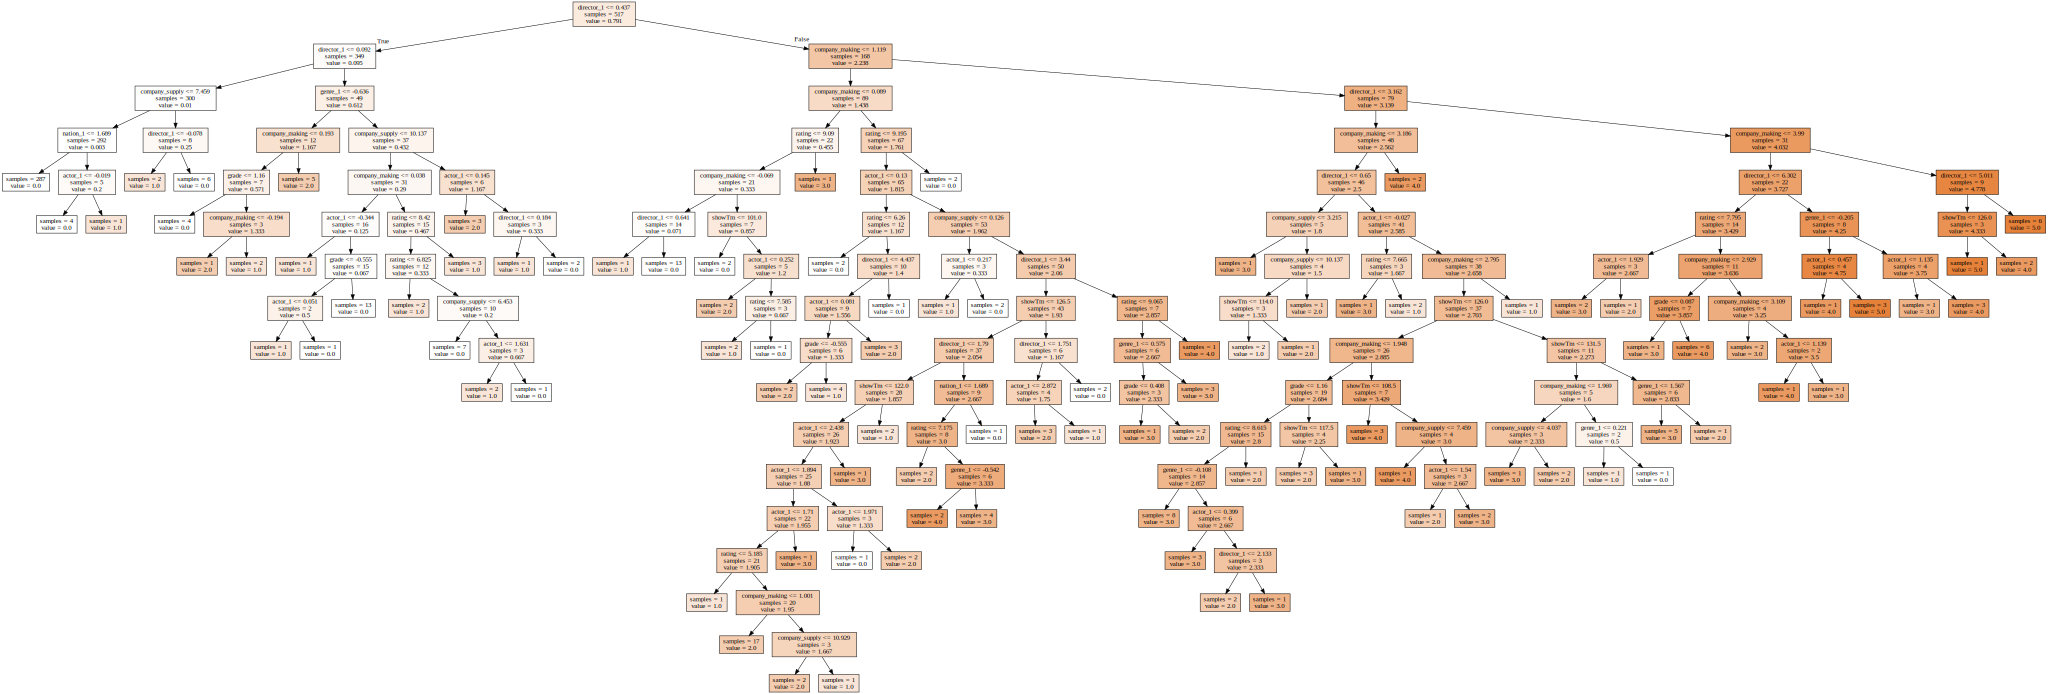

In [264]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [96]:
print("특성:", movie_feature_names)
print("특성 중요도:\n{}".format(movie_tree.feature_importances_))

특성: ['showTm' 'rating' 'director_1' 'actor_1' 'company_supply'
 'company_making' 'genre_1' 'grade' 'nation_1']
특성 중요도:
[0.02039191 0.03284207 0.66390327 0.03337317 0.020348   0.20045452
 0.01165465 0.00801962 0.00901278]


## Random Forest

In [39]:
## 2. RF
# Random Forest

from sklearn.ensemble import RandomForestClassifier



In [203]:
mov.columns

Index(['showTm', 'rating', 'director_1', 'actor_1', 'actor_2', 'actor_3',
       'company_supply', 'company_making', 'genre_1', 'grade', 'nation_1',
       'salesAcc', 'audiAcc', 'audiClass'],
      dtype='object')

Out-of-bag score estimate: 0.787
Mean accuracy score: 0.848
특성: ['showTm' 'rating' 'director_1' 'actor_1' 'company_supply' 'nation_1'
 'company_making' 'genre_1' 'grade' 'actor_2' 'actor_3']
특성 중요도:
[0.05931271 0.0674782  0.25494037 0.07517643 0.07577299 0.08111824
 0.10616829 0.22448551 0.03314009 0.01887292 0.00353426]
[[137   2   5   1   0   0]
 [  3   2   2   1   0   0]
 [  2   0   9   5   0   0]
 [  0   0   1  12   2   0]
 [  1   0   0   2   2   2]
 [  0   0   0   0   0   0]]
cross_validation.mean : 0.726


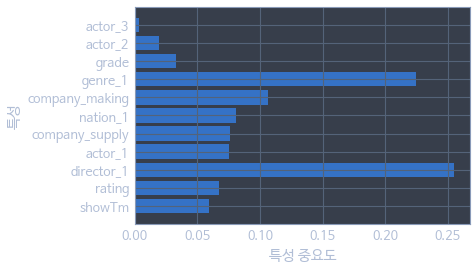

In [283]:
def movie_random_forest(mov):
    X = mov[mov.columns[0:11]]
    y = mov[mov.columns[13]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    movie_rf = RandomForestClassifier(n_estimators=120, criterion='entropy', oob_score = True, random_state=144)
    movie_rf.fit(X_train, y_train)
    
    predicted = movie_rf.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)

    print(f'Out-of-bag score estimate: {movie_rf.oob_score_:.3}')
    print(f'Mean accuracy score: {accuracy:.3}')
    
    print("특성:", movie_feature_names)
    print("특성 중요도:\n{}".format(movie_rf.feature_importances_))
    
    plot_feature_importances_movie(movie_rf)
    
    print(confusion_matrix(y_test, predicted, labels=[0, 1, 2, 3, 4, 5]))
    scores = cross_val_score(movie_rf, X, y, cv=kfold)
    print('cross_validation.mean : {:.3f}'.format(scores.mean()))
    
movie_random_forest(mov)

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [219]:
mov.columns.size

14

20% 내외 예측률 :  0.2513089005235602
Out-of-bag score estimate: 0.791
특성: ['showTm' 'rating' 'director_1' 'actor_1' 'company_supply' 'nation_1'
 'company_making' 'genre_1' 'grade' 'actor_2' 'actor_3']
특성 중요도:
[1.25968398e-02 2.55102691e-02 6.67703485e-01 2.24565574e-02
 2.54283993e-02 4.32033034e-02 6.01643958e-03 1.73624340e-01
 1.85470136e-02 4.66607716e-03 2.47276062e-04]
0.6328386443686886


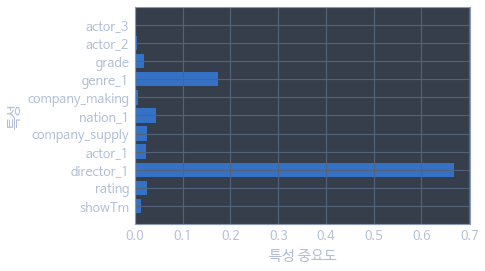

In [284]:
def movie_random_forest_regressor(mov):
    X = mov[mov.columns[0:11]]
    y = mov[mov.columns[12]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    movie_rfr = RandomForestRegressor(bootstrap=True,
                                     n_estimators=120,
                                     criterion='mse', 
                                     oob_score=True)
    movie_rfr.fit(X_train, y_train)
    
    predicted = movie_rfr.predict(X_test)

    preper = y_test/predicted
    print("20% 내외 예측률 : ",(preper[(preper>=0.8) & (preper<=1.2)]).count()/preper.count())
    print(f'Out-of-bag score estimate: {movie_rfr.oob_score_:.3}')
    print("특성:", movie_feature_names)
    print("특성 중요도:\n{}".format(movie_rfr.feature_importances_))
    
    plot_feature_importances_movie(movie_rfr)
    print(movie_rfr.score(X_test, y_test))
    #scores = cross_val_score(movie_rfr, X, y, cv=kfold)
    #print('cross_validation',scores)
    
movie_random_forest_regressor(mov)

## Linear Regression

Coefficients: 
 [0.46002238]
Mean squared error: 0.01
Variance score: 0.26


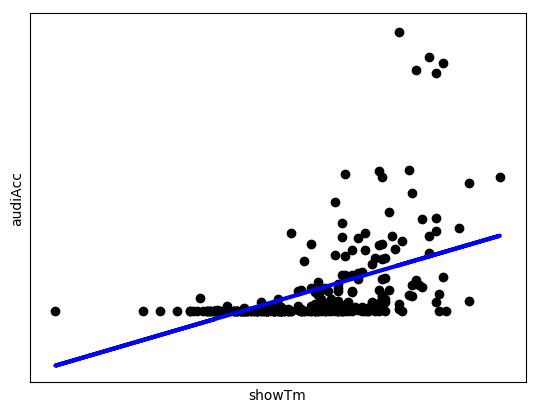

Coefficients: 
 [0.19464411]
Mean squared error: 0.02
Variance score: 0.11


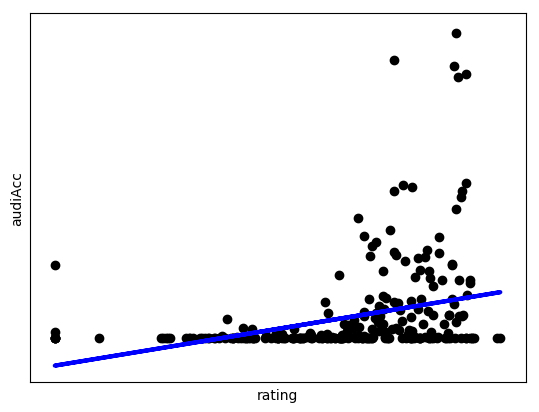

Coefficients: 
 [0.79049412]
Mean squared error: 0.01
Variance score: 0.69


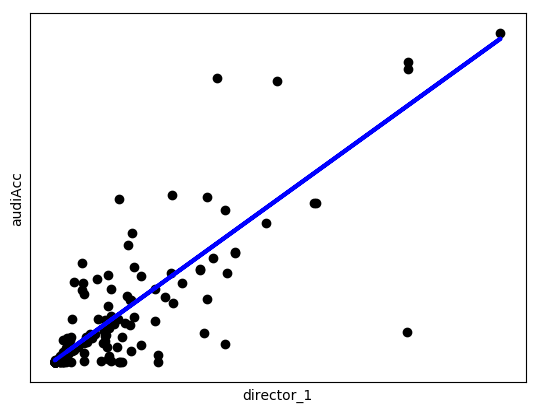

Coefficients: 
 [0.36140149]
Mean squared error: 0.01
Variance score: 0.25


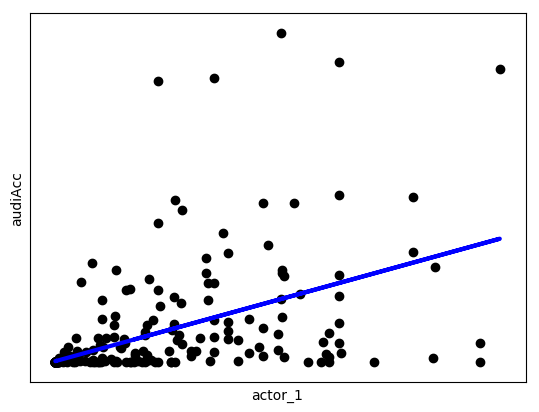

Coefficients: 
 [0.17345782]
Mean squared error: 0.01
Variance score: 0.27


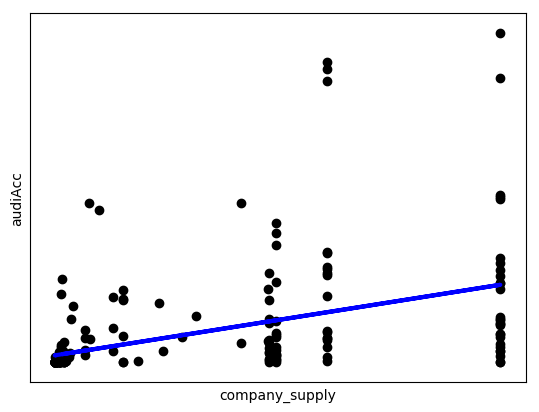

Coefficients: 
 [0.83887613]
Mean squared error: 0.01
Variance score: 0.62


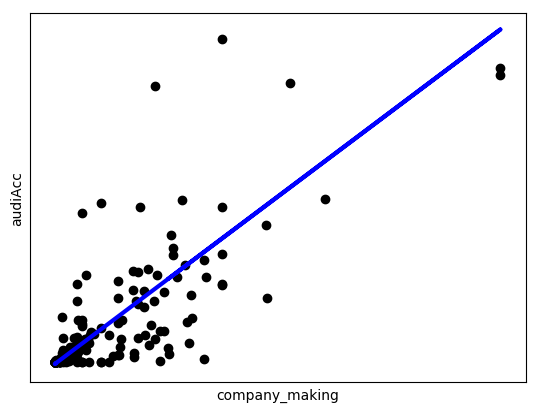

Coefficients: 
 [0.26547334]
Mean squared error: 0.02
Variance score: 0.10


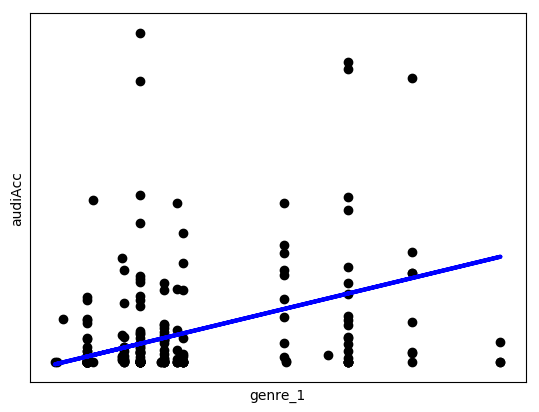

Coefficients: 
 [0.14722507]
Mean squared error: 0.01
Variance score: 0.13


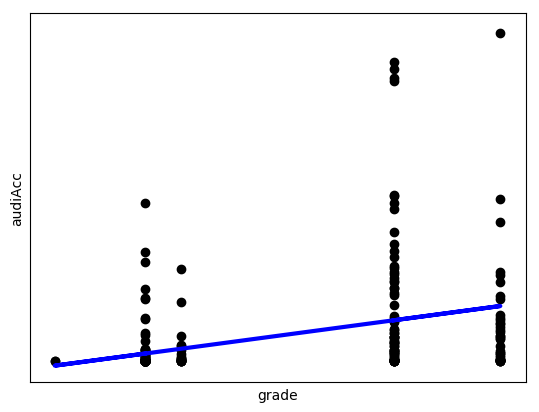

Coefficients: 
 [0.07822555]
Mean squared error: 0.02
Variance score: 0.01


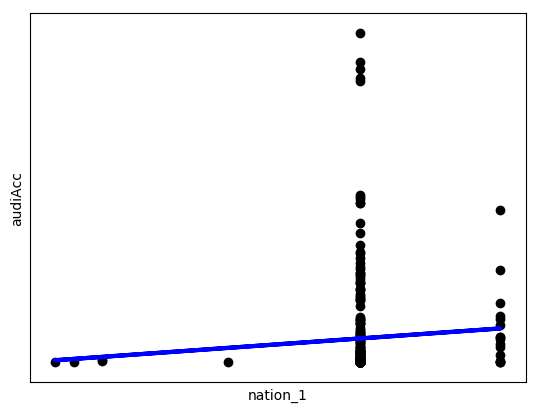

In [405]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def movie_linear_regression(mov) :
    for feature in mov.columns[:-3] :
        X = mov[[feature]]
        y = mov['audiAcc']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

        movie_lin_regr = LinearRegression()

        movie_lin_regr.fit(X_train, y_train)
        
        y_pred = movie_lin_regr.predict(X_test)
        
        print('Coefficients: \n', movie_lin_regr.coef_)
        print("Mean squared error: %.2f"
              % mean_squared_error(y_test, y_pred))
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % r2_score(y_test, y_pred))

        # Plot outputs
        plt.scatter(X_test, y_test,  color='black')
        plt.plot(X_test, y_pred, color='blue', linewidth=3)
        plt.xlabel(feature)
        plt.ylabel('audiAcc')
        plt.xticks(())
        plt.yticks(())

        plt.show()
        
movie_linear_regression(mov)

In [132]:
mov

,showTm,rating,director_1,actor_1,company_supply,company_making,genre_1,grade,nation_1,salesAcc,audiAcc,audiClass
190,89.0,8.23,-0.239693,-0.425046,-0.163364,-0.369782,-0.355175,-0.446440,0.630973,4.930000e+06,919.0,0
194,115.0,9.11,-0.059441,-0.421231,-0.115625,-0.290895,2.528785,-0.446440,2.056954,9.216970e+07,11368.0,0
210,107.0,9.24,-0.059441,-0.421231,-0.115625,-0.290895,2.528785,-0.446440,2.056954,1.169257e+08,13700.0,0
231,126.0,7.48,0.419335,-0.343386,4.194309,-0.220698,2.528785,-0.446440,2.056954,5.222450e+08,42976.0,0
232,129.0,8.93,1.010630,-0.424967,-0.065140,-0.362547,-0.355175,-0.664541,2.056954,7.034410e+07,9060.0,0
249,90.0,6.38,-0.239833,-0.410649,-0.163931,-0.297402,1.153869,0.838578,0.630973,3.840000e+06,4950.0,0
259,104.0,8.45,-0.240361,0.458789,0.119598,-0.370140,-0.161240,-0.664541,1.320417,6.205000e+05,82.0,0
260,74.0,8.76,-0.239998,-0.428388,-0.163612,-0.369917,-0.186674,1.481334,1.320417,2.961500e+06,446.0,0
267,102.0,9.33,-0.198632,-0.322890,1.109673,0.193035,-0.355175,0.838578,2.056954,9.877340e+07,11548.0,0
274,112.0,8.59,-0.013400,1.756699,0.119598,0.586108,1.310998,1.481334,1.320417,1.943500e+06,270.0,0


In [146]:
X = df
y = mov['audiAcc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123456)

In [147]:
movie_lin_regr = LinearRegression()

movie_lin_regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
y_pred = movie_lin_regr.predict(X_test)

Coefficients: 
 [49544.67712799]
Mean squared error: 4888129028361.14
Variance score: 0.22


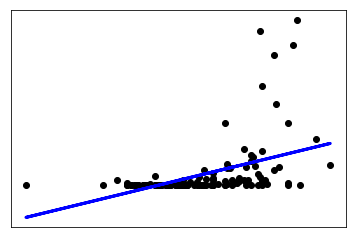

In [149]:
print('Coefficients: \n', movie_lin_regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [150]:
movie_lin_regr.score(X,y)

0.2386917755594803

## Logistic Regression

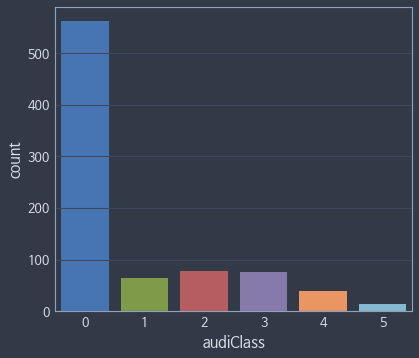

accuracy is :  0.7370517928286853
cross_validation.mean : 0.656


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [175]:
from sklearn.linear_model import LogisticRegression

def movie_logistic_regression(mov):
    X = mov[mov.columns[0:9]] # mov.iloc[:,0:9]
    y = mov['audiClass']
    
    sns.countplot(x='audiClass', data=mov)
    plt.show()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    movie_log_regr = LogisticRegression()
    movie_log_regr.fit(X_train, y_train)
    print("accuracy is : ",movie_log_regr.score(X_test, y_test))
    
    scores = cross_val_score(movie_log_regr, X, y, cv=kfold)
    print("cross_validation.mean : {:.3f}".format(scores.mean()))
    
movie_logistic_regression(mov)

## Support Vector Machine

In [50]:
from sklearn.svm import SVC
from sklearn import preprocessing

Accuracy: 0.708
cross_validation.mean : 0.574
Normalized confusion matrix
[[0.97142857 0.         0.         0.02857143 0.         0.        ]
 [0.76190476 0.04761905 0.14285714 0.04761905 0.         0.        ]
 [0.41666667 0.         0.41666667 0.125      0.04166667 0.        ]
 [0.19230769 0.03846154 0.15384615 0.46153846 0.15384615 0.        ]
 [0.         0.         0.15384615 0.         0.69230769 0.15384615]
 [0.         0.         0.         0.16666667 0.16666667 0.66666667]]


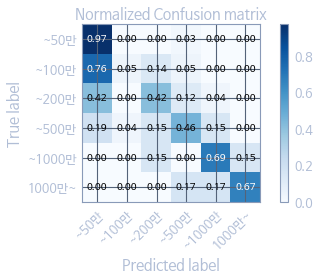

In [80]:
def movie_support_vector_machine(mov):
    movie_svm = SVC(kernel='linear', C=350, random_state=42, gamma=0.01)
    X = mov.iloc[:,0:11]
    y = mov.iloc[:,13]
    X = preprocessing.minmax_scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    movie_svm.fit(X_train, y_train)
    
    # print('Accuracy: %.3f' % movie_svm.score(X_test, y_test))
    print('Accuracy: {:.3f}'.format(movie_svm.score(X_test, y_test)))
    
    scores = cross_val_score(movie_svm, X, y, cv=kfold)
    print("cross_validation.mean : {:.3f}".format(scores.mean()))
    
    y_pred = movie_svm.predict(X_test)
    class_names = ['~50만', '~100만', '~200만', '~500만', '~1000만', '1000만~'] 
    plot_confusion_matrix(y_test, np.array(y_pred), classes=class_names,
                          normalize=True,
                          title='Normalized Confusion matrix')
    
movie_support_vector_machine(mov)

## Gradient Boosting Regression Tree

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

682
훈련 세트 정확도: 0.973
테스트 세트 정확도: 0.822
cross-validations : [0.42857143 0.7755102  0.86597938 0.79381443 0.80208333 0.81052632
 0.80851064 0.85106383 0.83870968 0.79569892]
cross-validation.mean: 0.777
Normalized confusion matrix
[[0.94285714 0.02380952 0.01904762 0.01428571 0.         0.        ]
 [0.52173913 0.2173913  0.2173913  0.04347826 0.         0.        ]
 [0.04761905 0.0952381  0.61904762 0.23809524 0.         0.        ]
 [0.         0.09090909 0.09090909 0.68181818 0.13636364 0.        ]
 [0.         0.         0.11111111 0.44444444 0.33333333 0.11111111]
 [0.         0.         0.         0.         0.         1.        ]]


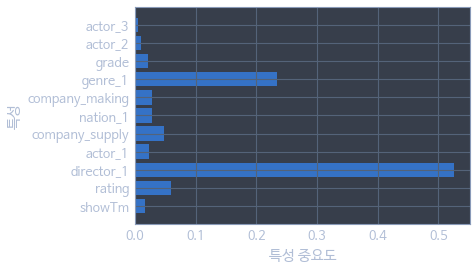

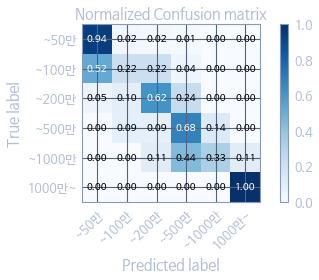

In [285]:
def movie_gradient_boosting_regression_tree(mov):
    X = mov.iloc[:, 0:11]
    y = mov.iloc[:, 13]
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    movie_gbrt = GradientBoostingClassifier(random_state=12345, n_estimators=141, 
                                            learning_rate=0.02)
    movie_gbrt.fit(X_train, y_train)
    kfold=KFold(n_splits=5)
    print(y[y==0].count())
    print("훈련 세트 정확도: {:.3f}".format(movie_gbrt.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(movie_gbrt.score(X_test, y_test)))
    scores = cross_val_score(movie_gbrt, X, y, cv=10)
    print("cross-validations : {}".format(scores))
    print("cross-validation.mean: {:.3f}".format(scores.mean()))
    
    plot_feature_importances_movie(movie_gbrt)
    
    y_pred = movie_gbrt.predict(X_test)
    class_names = ['~50만', '~100만', '~200만', '~500만', '~1000만', '1000만~'] 
    plot_confusion_matrix(y_test, np.array(y_pred), classes=class_names,
                          normalize=True,
                          title='Normalized Confusion matrix')
    
movie_gradient_boosting_regression_tree(mov)

In [90]:
mov['showTm'] = preprocessing.minmax_scale(mov['showTm'])

In [92]:
mov['rating'] = preprocessing.minmax_scale(mov['rating'])

In [123]:
tl = mov.columns
for col in tl[:-1]:
    mov[col] = preprocessing.minmax_scale(mov[col])

In [124]:
mov

,showTm,rating,director_1,actor_1,company_supply,company_making,genre_1,grade,nation_1,salesAcc,audiAcc,audiClass
0,0.677019,0.845,7.075255e-01,3.231488e-01,1.000000e+00,4.883142e-01,0.802516,0.761081,0.68465,1.000000e+00,1.000000e+00,5
1,0.745342,0.783,7.907994e-01,6.699094e-01,4.817107e-01,9.762680e-01,0.521568,1.000000,0.68465,8.523076e-01,8.181163e-01,5
2,0.664596,0.901,1.000000e+00,4.236507e-01,1.000000e+00,3.748995e-01,0.193744,1.000000,0.68465,8.171872e-01,8.096831e-01,5
3,0.645963,0.901,3.409644e-01,4.236507e-01,1.000000e+00,4.762004e-01,0.659549,0.761081,0.68465,7.746906e-01,7.614989e-01,5
4,0.757764,0.771,7.907994e-01,6.699094e-01,9.925869e-02,9.762680e-01,0.521568,1.000000,0.68465,7.562460e-01,6.968232e-01,5
5,0.745342,0.897,7.929071e-01,8.327426e-01,6.110430e-01,1.000000e+00,0.659549,0.761081,0.68465,7.253246e-01,7.213368e-01,5
6,0.732919,0.904,4.994181e-01,1.923542e-01,6.110430e-01,2.239420e-01,0.193744,0.761081,0.68465,7.061827e-01,6.919579e-01,5
7,0.720497,0.761,7.929071e-01,5.317664e-01,6.110430e-01,1.000000e+00,0.659549,0.761081,0.68465,6.899662e-01,7.370706e-01,5
8,0.614907,0.799,1.773770e-01,7.111907e-01,4.961179e-01,3.499296e-01,0.659549,0.761081,0.68465,6.863977e-01,6.566327e-01,5
9,0.670807,0.883,9.526033e-01,5.347236e-01,4.961179e-01,6.428814e-01,0.247962,0.761081,0.68465,6.735118e-01,7.272845e-01,5


## XGBoost

In [94]:
import xgboost as xgb

In [95]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

[[6.84848485e-01 8.45000000e-01 7.07525522e-01 ... 8.02515893e-01
  7.61081073e-01 6.84650402e-01]
 [7.51515152e-01 7.83000000e-01 7.90799409e-01 ... 5.21567977e-01
  1.00000000e+00 6.84650402e-01]
 [6.72727273e-01 9.01000000e-01 1.00000000e+00 ... 1.93744037e-01
  1.00000000e+00 6.84650402e-01]
 ...
 [2.90909091e-01 0.00000000e+00 2.51046243e-03 ... 7.63703643e-02
  2.02355286e-01 6.84650402e-01]
 [3.21212121e-01 6.44000000e-01 0.00000000e+00 ... 7.63703643e-02
  2.02355286e-01 6.84650402e-01]
 [4.84848485e-01 5.19000000e-01 8.81526079e-06 ... 7.63703643e-02
  2.02355286e-01 6.84650402e-01]]
훈련 세트 정확도: 0.911
테스트 세트 정확도: 0.804
Cross Validation.mean: 0.800
Normalized confusion matrix
[[0.95073892 0.01970443 0.01477833 0.00985222 0.00492611 0.        ]
 [0.54545455 0.22727273 0.22727273 0.         0.         0.        ]
 [0.10526316 0.10526316 0.63157895 0.10526316 0.05263158 0.        ]
 [0.03846154 0.03846154 0.15384615 0.61538462 0.15384615 0.        ]
 [0.         0.         0.181818

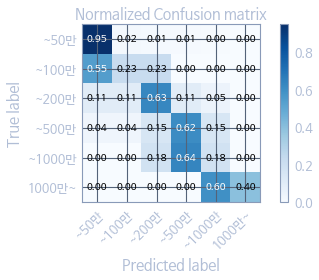

In [303]:
def movie_xgboost_classifier(mov):
    rng = np.random.RandomState(3341)
    X = mov.iloc[:, 0:11]
    y = mov.iloc[:, 13]
    
    X = preprocessing.minmax_scale(X) # standardization 0 ~ 1
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=rng)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    movie_xgb = xgb.XGBClassifier(max_depth=3,
                                  learning_rate=0.02,
                                  n_estimators=120,
                                  gamma=0.1,
                                  booster='gbtree')
    movie_xgb.fit(X_train, y_train)
#    y_pred = movie_xgb.predict(y_train)
    print("훈련 세트 정확도: {:.3f}".format(movie_xgb.score(X_train, y_train)))
    # y_pred = movie_xgb.predict(y_test)
    print("테스트 세트 정확도: {:.3f}".format(movie_xgb.score(X_test, y_test)))
    scores = cross_val_score(movie_xgb, X, y, cv=kfold)
    print("Cross Validation.mean: {:.3f}".format(scores.mean()))
    
    y_pred = movie_xgb.predict(X_test)
    class_names = ['~50만', '~100만', '~200만', '~500만', '~1000만', '1000만~'] 
    plot_confusion_matrix(y_test, np.array(y_pred), classes=class_names,
                          normalize=True,
                          title='Normalized Confusion matrix')
    

movie_xgboost_classifier(mov)

[0]	eval-auc:0.776173	train-auc:0.787104
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 10 rounds.
[1]	eval-auc:0.885654	train-auc:0.892544
[2]	eval-auc:0.898301	train-auc:0.903055
[3]	eval-auc:0.905927	train-auc:0.910661
[4]	eval-auc:0.906505	train-auc:0.911813
[5]	eval-auc:0.908767	train-auc:0.913131
[6]	eval-auc:0.909164	train-auc:0.9142
[7]	eval-auc:0.909398	train-auc:0.915048
[8]	eval-auc:0.908087	train-auc:0.915834
[9]	eval-auc:0.906763	train-auc:0.916726
[10]	eval-auc:0.907285	train-auc:0.917452
[11]	eval-auc:0.907395	train-auc:0.917965
[12]	eval-auc:0.907262	train-auc:0.918241
[13]	eval-auc:0.907195	train-auc:0.918357
[14]	eval-auc:0.907177	train-auc:0.91873
[15]	eval-auc:0.906431	train-auc:0.918994
[16]	eval-auc:0.906804	train-auc:0.919177
[17]	eval-auc:0.906026	train-auc:0.919639
[18]	eval-auc:0.906069	train-auc:0.919755
[19]	eval-auc:0.906081	train-auc:0.919751
[20]	eval-auc:0.906204	train-a

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[159]	eval-auc:0.903178	train-auc:0.926489
[160]	eval-auc:0.903151	train-auc:0.926504
[161]	eval-auc:0.90325	train-auc:0.926533
[162]	eval-auc:0.903471	train-auc:0.926534
[163]	eval-auc:0.90352	train-auc:0.926547
[164]	eval-auc:0.903375	train-auc:0.926556
[165]	eval-auc:0.903339	train-auc:0.926573
[166]	eval-auc:0.903578	train-auc:0.926588
[167]	eval-auc:0.903479	train-auc:0.926612
[168]	eval-auc:0.903367	train-auc:0.926633
[169]	eval-auc:0.9036	train-auc:0.926628
[170]	eval-auc:0.903487	train-auc:0.926637
[171]	eval-auc:0.903394	train-auc:0.926652
[172]	eval-auc:0.902957	train-auc:0.926681
[173]	eval-auc:0.902986	train-auc:0.926693
[174]	eval-auc:0.903176	train-auc:0.926684
[175]	eval-auc:0.903164	train-auc:0.926705
[176]	eval-auc:0.903144	train-auc:0.926725
[177]	eval-auc:0.90313	train-auc:0.926734
[178]	eval-auc:0.903068	train-auc:0.92674
[179]	eval-auc:0.902887	train-auc:0.926759
[180]	eval-auc:0.903046	train-auc:0.926767
[181]	eval-auc:0.902869	train-auc:0.926777
[182]	eval-auc:0.

[351]	eval-auc:0.902991	train-auc:0.927557
[352]	eval-auc:0.903017	train-auc:0.927561
[353]	eval-auc:0.902998	train-auc:0.927561
[354]	eval-auc:0.903049	train-auc:0.927556
[355]	eval-auc:0.903013	train-auc:0.927562
[356]	eval-auc:0.90305	train-auc:0.927555
[357]	eval-auc:0.902871	train-auc:0.927565
[358]	eval-auc:0.902846	train-auc:0.92756
[359]	eval-auc:0.902889	train-auc:0.927565
[360]	eval-auc:0.902962	train-auc:0.927569
[361]	eval-auc:0.903056	train-auc:0.927576
[362]	eval-auc:0.903059	train-auc:0.927583
[363]	eval-auc:0.90319	train-auc:0.927568
[364]	eval-auc:0.903118	train-auc:0.927575
[365]	eval-auc:0.903084	train-auc:0.927587
[366]	eval-auc:0.903101	train-auc:0.927589
[367]	eval-auc:0.903124	train-auc:0.927588
[368]	eval-auc:0.903275	train-auc:0.927595
[369]	eval-auc:0.903126	train-auc:0.927603
[370]	eval-auc:0.903111	train-auc:0.927601
[371]	eval-auc:0.903168	train-auc:0.927609
[372]	eval-auc:0.90323	train-auc:0.927605
[373]	eval-auc:0.90323	train-auc:0.927604
[374]	eval-auc:0

[543]	eval-auc:0.902384	train-auc:0.927873
[544]	eval-auc:0.902424	train-auc:0.927873
[545]	eval-auc:0.902409	train-auc:0.927873
[546]	eval-auc:0.902378	train-auc:0.927873
[547]	eval-auc:0.902376	train-auc:0.92787
[548]	eval-auc:0.90237	train-auc:0.927874
[549]	eval-auc:0.902337	train-auc:0.927873
[550]	eval-auc:0.902347	train-auc:0.927878
[551]	eval-auc:0.902351	train-auc:0.927877
[552]	eval-auc:0.902341	train-auc:0.927881
[553]	eval-auc:0.902318	train-auc:0.927883
[554]	eval-auc:0.90237	train-auc:0.927881
[555]	eval-auc:0.902316	train-auc:0.92788
[556]	eval-auc:0.902317	train-auc:0.927883
[557]	eval-auc:0.902245	train-auc:0.927882
[558]	eval-auc:0.90225	train-auc:0.927884
[559]	eval-auc:0.902384	train-auc:0.927886
[560]	eval-auc:0.902372	train-auc:0.927886
[561]	eval-auc:0.902334	train-auc:0.927886
[562]	eval-auc:0.90231	train-auc:0.927887
[563]	eval-auc:0.902355	train-auc:0.927887
[564]	eval-auc:0.902321	train-auc:0.927891
[565]	eval-auc:0.902324	train-auc:0.92789
[566]	eval-auc:0.9

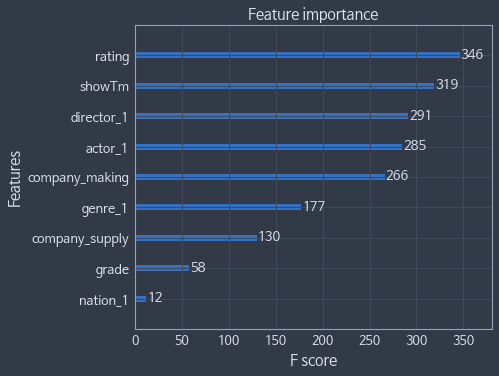

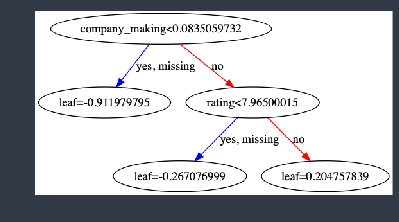

In [330]:
def movie_xgboost_regression(mov):
    try:
        y = mov.iloc[:, 11]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3341)
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dtest = xgb.DMatrix(X_test, label=y_test)
        param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
        param['nthread'] = 4
        param['eval_metric'] = 'auc'
        evallist = [(dtest, 'eval'), (dtrain, 'train')]
        num_round = 1000
        bst = xgb.train(params=param, dtrain=dtrain, num_boost_round=num_round,
                        evals=evallist, early_stopping_rounds=10)
        print("best ntree limit: {}".format(bst.best_ntree_limit))
        # print(bst.predict(dtest))
        xgb.plot_importance(bst)
        xgb.plot_tree(bst, num_trees=2)
        xgb.to_graphviz(bst, num_trees=2)
        
        # plot_confusion_matrix(y_test)

    except :
        print(dtrain.get_label)
        
movie_xgboost_regression(mov)

## Multilayered Perceptron

In [144]:
from sklearn.neural_network import MLPClassifier

훈련 세트 정확도: 0.797
테스트 세트 정확도: 0.756
Cross Validation.mean : 0.678
Normalized confusion matrix
[[0.94326241 0.0212766  0.0141844  0.0212766  0.         0.        ]
 [0.5        0.0625     0.3125     0.125      0.         0.        ]
 [0.3        0.1        0.45       0.15       0.         0.        ]
 [0.         0.         0.31578947 0.47368421 0.21052632 0.        ]
 [0.         0.         0.1        0.3        0.5        0.1       ]
 [0.         0.         0.         0.         0.66666667 0.33333333]]


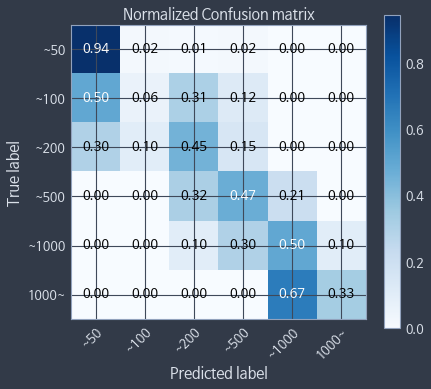

In [329]:
def movie_multilayered_perceptron(mov):
    X = mov.iloc[:,0:9]
    y = mov.iloc[:,11]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1232)
    
    movie_mlp = MLPClassifier(hidden_layer_sizes=225,
                              max_iter=100,
                              activation='tanh',
                              solver='lbfgs', 
                              alpha=0.001, 
                              random_state=0).fit(X_train, y_train)
    
    print("훈련 세트 정확도: {:.3f}".format(movie_mlp.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(movie_mlp.score(X_test, y_test)))
    
    scores = cross_val_score(movie_mlp, X, y, cv=kfold)
    print("Cross Validation.mean : {:.3f}".format(scores.mean()))
    y_pred = movie_mlp.predict(X_test)
    target_names = ['~50', '~100', '~200', '~500', '~1000', '1000~']
    labels = ['0', '1', '2', '3', '4', '5']
    # print(y_pred)
    plot_confusion_matrix(y_test, np.array(y_pred), classes=target_names,
                          normalize=True,
                          title='Normalized Confusion matrix')
    
    
movie_multilayered_perceptron(mov)